In [106]:
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [107]:
img = np.asarray(Image.open('cguitar.tif'))

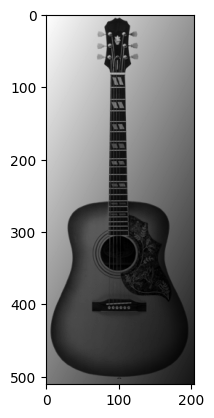

In [108]:
# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

In [109]:
# TODO: Compute least-squares estimate from selected corrupt pixels


ix = []
iy =[]
ec = []


for y in range(250):
    for x in range(50):
        ix.append(x)
        iy.append(y)
        ec.append(img[y,x])


ix = np.array(ix)
iy = np.array(iy)
ec = np.array(ec)

#print (ix, iy, ec)

a = np.vstack([ix, iy, np.ones(len(ix))]).T
b = ec/255
q = np.linalg.lstsq(a, b, rcond=None)[0]

A,B,C = q[:3]

print ("f(x,y) = {A}x + {B}y + {C}".format(A=A, B=B, C=C))
#q = inv(a.T @ a) @ a.T @ b



f(x,y) = -0.002000256479062526x + -0.0009999701905818153y + 0.9952456312879963


In [110]:
# TODO: Undo the image corruption

corruption = np.zeros_like(img,dtype=np.float64)
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        z = A*x + B*y + C
        if z < 0:
            z = 0
        if z > 1:
            z = 1
        corruption[y,x] = z

e =img.astype(np.float64)/corruption




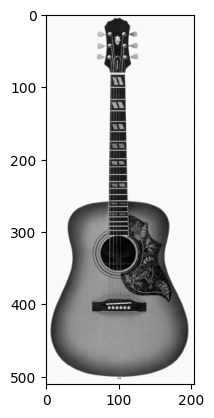

In [111]:
# TODO: Display the uncorrupted image
plt.imshow(e, cmap='gray')
plt.show()